<a href="https://colab.research.google.com/github/serpawatwit/EAI21/blob/main/Boston_housing_dense_NN_using_Keras_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting house prices

The idea is borrowed from  Chollet (2017, p.85) [Git link](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.7-predicting-house-prices.ipynb)

Solves regression problem using scikit LinReg and a fully connected NN designed with Keras.

See Chollet [Git link](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.7-predicting-house-prices.ipynb) for K-fold validation.

Given datappoints about the housing in Boston in mid 70's, predict sale price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [2]:
%tensorflow_version 1.x
from keras.datasets import boston_housing

TensorFlow is already loaded. Please restart the runtime to change versions.


In [3]:
#scikit version has descriptions:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#Format: Dictionary 
# print(boston.keys())
#Size it up
print(boston.data.shape)
#What are the 13 features?
print(boston.feature_names)

boston.target.shape

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(506,)

In [5]:
#info on the data.
#pandas are pretty. 
df = pd.DataFrame(boston.data)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Normalize data

0 mean and unit variance

Note: we should technically use only the train data here. 

In [6]:
X = boston.data
y = boston.target
print(X.shape, y.shape)

X -= X.mean(0)
X /= X.std(0)

df = pd.DataFrame(X)
df.describe()


(506, 13) (506,)


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-5.285627e-16,-2.354671e-15,5.092545e-16,2.544736e-15,-1.146031e-14,-1.122510e-15,9.834031e-16,1.553873e-15,-8.012914e-16,-1.020966e-14,8.075008e-15,-3.370163e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


In [7]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, train_size=0.8)

print(Xtrain.shape, ytrain.shape)

(404, 13) (404,)


In [8]:
print("Attributes:\n", Xtrain[:3], "\n Prices:\n", ytrain[:3])

Attributes:
 [[ 1.32780421 -0.48772236  1.01599907 -0.27259857  0.51229565 -1.39706929
   1.02148094 -0.80543822  1.66124525  1.53092646  0.80657583 -0.07887794
   1.7181012 ]
 [-0.34750602 -0.48772236 -0.43725801 -0.27259857 -0.14421743 -0.64200019
  -0.42939039  0.33444943 -0.6379618  -0.6012761   1.17646583  0.42701755
  -0.5863558 ]
 [-0.41648392  1.01446252 -0.74074945 -0.27259857 -1.00891427 -0.36134243
  -1.61000138  1.35273767 -0.98284286 -0.61909395 -0.71922039  0.06113692
  -0.67606702]] 
 Prices:
 [12.  19.9 19.4]


## Linear Regression

[Diabetes dataset Linear Regression Model example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

In [9]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#SciKit Lin Reg using the train/test split:
#1. Create a model
#2. Train
#3. Predict

#ME
model = LinearRegression(fit_intercept=True)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)


MSE Linear Regression: 24.29


Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

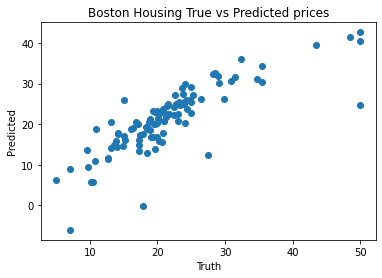

In [10]:
#Calculate error and plot
mse = mean_squared_error(ytest, y_model)
print("MSE Linear Regression: %.2f" % mse)

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

### Solution

What did the model learn?

In [11]:
# Model weights:
print("Model intercept:", model.intercept_)
print("Model slopes:    ", model.coef_)

Model intercept: 22.485268239316913
Model slopes:     [-0.97149423  0.70155562  0.27675212  0.70653152 -1.99143043  3.11571836
 -0.17706021 -3.04577065  2.28278471 -1.79260468 -1.97995351  1.12649864
 -3.62814937]


### Bonus

Add poly features via a pipeline

What is a good degree for this model?

[make_pipeline documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#ME
model = make_pipeline(PolynomialFeatures(2), LinearRegression(fit_intercept=True))


MSE Linear Regression: 14.25
MAE Linear Regression: 2.57


Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

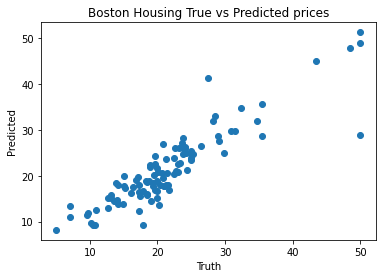

In [13]:
#train and evaluate 

model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

#Calculate error and plot
mse = mean_squared_error(ytest, y_model)
print("MSE Linear Regression: %.2f" % mse)

mae = mean_absolute_error(ytest, y_model)
print("MAE Linear Regression: %.2f" % mae)

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

## Dense NN using Keras

In [14]:
from keras import models
from keras import layers

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [15]:
# define model

#Dense is a fully-connected NN: activation(dot(input, kernel) + bias)

def ex_model():
	# Add layers in given order
  model = Sequential() 
  #Seq: indicates we want to define the NN layer by layer;
  #each layer stacks on top of the next. 
  #comes with fit,eval,predict. (and corresponding generators)
  
  model.add(Dense(13, input_shape=(Xtrain.shape[1],), activation='relu'))
  #we only need input size for the first layer. After that, it will auto-fill.

  model.add(Dense(1))
  #no actications for the output layer. used for predicting a continous value.
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
  return model


Epoch 1/10
404/404 [==============================] - 14s 1ms/step - loss: 607.7304 - mae: 23.0089
Epoch 2/10
404/404 [==============================] - 0s 1ms/step - loss: 452.7909 - mae: 19.3627
Epoch 3/10
404/404 [==============================] - 0s 1ms/step - loss: 258.7690 - mae: 13.9426
Epoch 4/10
404/404 [==============================] - 0s 1ms/step - loss: 108.9560 - mae: 8.1932
Epoch 5/10
404/404 [==============================] - 0s 1ms/step - loss: 58.8921 - mae: 5.7313
Epoch 6/10
404/404 [==============================] - 0s 1ms/step - loss: 45.8068 - mae: 4.9445
Epoch 7/10
404/404 [==============================] - 0s 1ms/step - loss: 29.0401 - mae: 4.1617
Epoch 8/10
404/404 [==============================] - 0s 1ms/step - loss: 31.7783 - mae: 4.0670
Epoch 9/10
404/404 [==============================] - 0s 1ms/step - loss: 28.0688 - mae: 3.8927
Epoch 10/10
404/404 [==============================] - 0s 1ms/step - loss: 26.1582 - mae: 3.7006
MSE Keras example: 30.32


Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

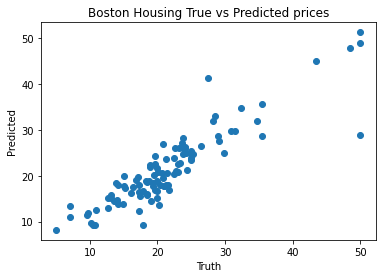

In [16]:
model = ex_model()
ne = 10 #number of train loops
model.fit(Xtrain, ytrain, epochs=ne, batch_size=1, verbose=1)
#see performance on test data using trained model
y_nn = model.predict(Xtest)

#Calculate error and plot
mse = mean_squared_error(ytest, y_nn)
print("MSE Keras example: %.2f" % mse)

#compare labels
plt.scatter(ytest, y_nn)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

In [17]:
#alternative approach with cross-validation
#model object
# estimator = KerasRegressor(build_fn=ex_model, epochs=100, batch_size=5, verbose=1)
# 
# cvf = KFold(n_splits=2)
# results = cross_val_score(estimator, X, y, cv=cvf)
# print("Results: %.2f (+/-%.2f) MSE" % (results.mean(), results.std()))

# Results: -88.81 (46.90) MSE

## Exercise

Tune your own neural network to beat linear regression:

`MSE Linear Regression: 24.29`

What should I change? 
- train time: What is a good *ne* (number of train loops/epochs)? 
- Make the network deeper/wider
  - tune # of layers/neurons in the model. 

### Larger model example

#### How to create a deeper model?
Add another layer to your model to make it more flexible <br>

#### How to create wider models?
increase 13 to 30.



**Con:** The larger the model, the more coeff you have to train. This requires:
- more data 
- more training time
If you don't have enough data, your model will *overfit* and won't be able to generalize.


Epoch 1/64
404/404 [==============================] - 2s 2ms/step - loss: 161.9740 - mae: 9.4954
Epoch 2/64
404/404 [==============================] - 1s 2ms/step - loss: 22.8872 - mae: 3.5344
Epoch 3/64
404/404 [==============================] - 1s 2ms/step - loss: 23.5885 - mae: 3.4855
Epoch 4/64
404/404 [==============================] - 1s 2ms/step - loss: 12.9509 - mae: 2.5776
Epoch 5/64
404/404 [==============================] - 1s 2ms/step - loss: 10.8815 - mae: 2.5055
Epoch 6/64
404/404 [==============================] - 1s 2ms/step - loss: 18.9822 - mae: 3.1010
Epoch 7/64
404/404 [==============================] - 1s 2ms/step - loss: 10.5944 - mae: 2.4139
Epoch 8/64
404/404 [==============================] - 1s 2ms/step - loss: 17.8022 - mae: 3.1422
Epoch 9/64
404/404 [==============================] - 1s 2ms/step - loss: 12.5744 - mae: 2.8703
Epoch 10/64
404/404 [==============================] - 1s 2ms/step - loss: 14.9823 - mae: 2.6466
Epoch 11/64
404/404 [=================

Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

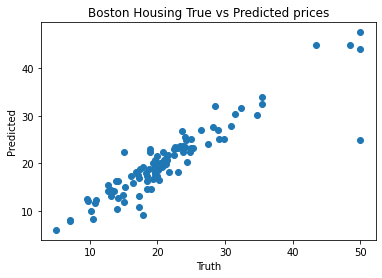

In [20]:

def my_model():
	# Add layers in given order
  model = Sequential()
  model.add(Dense(128, input_shape=(Xtrain.shape[1],), activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1))
	# Compile model
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
  return model

ne = 64 #number of train loops

#Train
model = my_model()
model.fit(Xtrain, ytrain, epochs=ne, batch_size=1, verbose=1)

#Test
#see performance on test data using trained model
y_nn = model.predict(Xtest)
#Calculate error and plot
mse = mean_squared_error(ytest, y_nn)
print("Test: MSE my network: %.2f" % mse)

mae = mean_absolute_error(ytest, y_nn)
print("Test: MAE my network: %.2f" % mae)

#compare labels
plt.scatter(ytest, y_nn)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

### What did we learn?

In [21]:
weights, bias = model.layers[1].get_weights()

print('Weights size: \n', weights.shape)
      
print('Weights: \n', weights,'\n Bias: \n' ,bias)

Weights size: 
 (128, 128)
Weights: 
 [[-0.04165901 -0.10711373 -0.08493194 ... -0.05111486 -0.24628675
  -0.19719315]
 [-0.01510939 -0.04958994 -0.01899957 ... -0.14281261 -0.08570752
  -0.04435495]
 [ 0.02233751 -0.07576513  0.07998275 ...  0.07667205  0.12661651
   0.03415853]
 ...
 [-0.00837354  0.00269647 -0.06664462 ... -0.05818047 -0.17847303
  -0.07201324]
 [ 0.07237002 -0.00971027 -0.13451122 ...  0.03272134  0.04626097
   0.07953075]
 [-0.03358403  0.03438082 -0.03492945 ...  0.05128345  0.02803271
  -0.08461209]] 
 Bias: 
 [-6.63866028e-02  1.97868124e-02 -2.89909672e-02  5.27224690e-02
 -7.10672811e-02 -6.32978305e-02 -1.01828657e-01  2.04412639e-02
 -6.63630888e-02 -4.99423109e-02  1.22464113e-01 -2.65885461e-02
 -2.01344088e-01 -4.87654209e-02  5.34573616e-03 -8.23367462e-02
  1.62064254e-01 -4.39225100e-02 -6.43844455e-02 -7.01079816e-02
 -1.17402459e-02 -2.40628775e-02 -3.07276491e-02 -1.05902608e-02
  2.15797305e-01 -7.64017180e-02  4.89123166e-02 -7.81193972e-02
 -3.8